In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
# city_data_to_load = "data/city_data.csv"
# ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
df = pd.merge(city_df, ride_df, on="city")

# Display the data table for preview
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

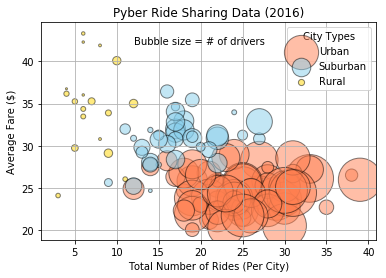

In [12]:
# Obtain the x and y coordinates for each of the three city types
urban_city = df.loc[df["type"] == "Urban"]
suburban_city = df.loc[df["type"] == "Suburban"]
rural_city = df.loc[df["type"] == "Rural"]

#avg fare for cities
urban_fare = urban_city.groupby("city")["fare"].mean()
suburban_fare = suburban_city.groupby("city")["fare"].mean()
rural_fare = rural_city.groupby("city")["fare"].mean()

#total number of rides per city
urban_rides = urban_city.groupby("city")["ride_id"].count()
suburban_rides = suburban_city.groupby("city")["ride_id"].count()
rural_rides = rural_city.groupby("city")["ride_id"].count()

#total number of drivers per city
urban_drivers = urban_city.groupby("city")["driver_count"].sum()
suburban_drivers = suburban_city.groupby("city")["driver_count"].sum()
rural_drivers = rural_city.groupby("city")["driver_count"].sum()

# Build the scatter plots for each city types
urban_plot = plt.scatter(urban_rides,urban_fare, s = urban_drivers, marker="o", color="coral", edgecolors="black", label="Urban", alpha=.5, linewidth=1)
suburban_plot = plt.scatter(suburban_rides, suburban_fare, s = suburban_drivers, marker="o", color="skyblue", edgecolors="black", label="Suburban", alpha=.5, linewidth=1)
rural_plot = plt.scatter(rural_rides, rural_fare, s = rural_drivers, marker="o", color="gold", edgecolors="black", label="Rural", alpha=.5, linewidth=1)

# Incorporate the other graph properties
x_limit = 41
y_limit = 45
x_axis = np.arange(0, x_limit, 1)
y_axis = np.arange(19, y_limit, 41)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend(title="City Types", handles=[urban_plot, suburban_plot, rural_plot], loc="upper right")
plt.grid()

# Incorporate a text label regarding circle size
plt.text(12, 42,"Bubble size = # of drivers", fontsize=10)

# Save Figure
plt.savefig("../Images/Bubbleplot.png")

#Show plot
plt.show()

## Total Fares by City Type

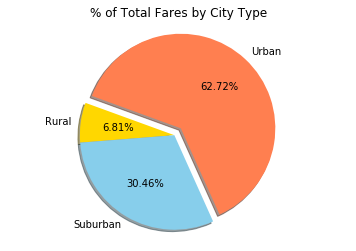

In [13]:
# Calculate Type Percents
city_fares = df.groupby("type")["fare"].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.1)

plt.pie(city_fares, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=160)
plt.axis("equal")

# Save Figure
plt.savefig("../Images/FaresPie.png")
plt.title("% of Total Fares by City Type")

# Show pie
plt.show()

## Total Rides by City Type

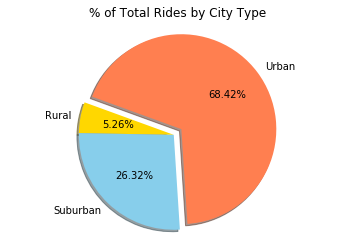

In [14]:
# Calculate Ride Percents
city_rides = df.groupby("type")["ride_id"].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.1)

plt.pie(city_rides, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=160)
plt.axis("equal")

# Save Figure
plt.savefig("../Images/RidesPie.png")
plt.title("% of Total Rides by City Type")

# Show pie
plt.show()

## Total Drivers by City Type

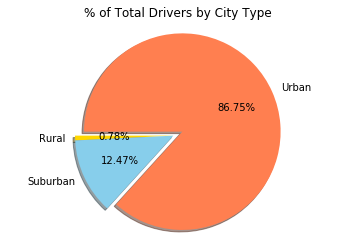

In [15]:
# Calculate Driver Percents
city_drivers = df.groupby("type")["driver_count"].sum()

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.1)

plt.pie(city_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=180)
plt.axis("equal")

# Save Figure
plt.savefig("../Images/DriversPie.png")
plt.title("% of Total Drivers by City Type")

# Show pie
plt.show()